# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

# Más allá de Hello World, un ejemplo de visión artificial
-
Más allá de Hello World, un ejemplo de visión artificial
En el ejercicio anterior, vio cómo crear una red neuronal que descubrió el problema que estaba tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque hubiera sido más fácil escribir la función Y = 2x-1 directamente, en lugar de molestarse en usar Machine Learning para aprender la relación entre X e Y para un conjunto fijo de valores, y extendiendo eso para todos los valores.

Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por computadora? Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

## Start Coding

Let's start with our import of TensorFlow
-
Comencemos con nuestra importación de TensorFlow

In [38]:
import tensorflow as tf
print(tf.__version__)

2.3.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this: - Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de tf.keras. Lo cargas así:


In [39]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels. - Llamar a load_data en este objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [40]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0 / ¿Cómo se ven estos valores? Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver ... Experimente con diferentes índices en la matriz. Por ejemplo, también eche un vistazo al índice 42 ... es un arranque diferente al del índice 0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 

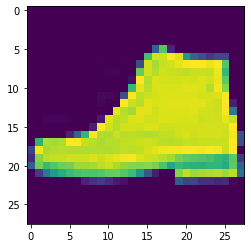

In [41]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called **'normalizing'**...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this: / Notarás que todos los valores en el número están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado "normalización". .y afortunadamente en Python es fácil normalizar una lista como esta sin bucles. Lo haces así:

In [42]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen! / Ahora puede que te preguntes por qué hay 2 conjuntos ... entrenamiento y prueba. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener un conjunto de datos para el entrenamiento y luego otro conjunto de datos ... que el modelo aún no ha visto ... para ver qué tan bueno sería para clasificar valores. Después de todo, cuando haya terminado, querrá probarlo con datos que no había visto anteriormente.

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. / Diseñemos ahora el modelo. Hay bastantes conceptos nuevos aquí, pero no se preocupe, los dominará.

In [43]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!  /

Secuencial: que define una SECUENCIA de capas en la red neuronal

Aplanar: ¿Recuerda antes donde nuestras imágenes eran un cuadrado, cuando las imprimió? Flatten solo toma ese cuadrado y lo convierte en un conjunto de 1 dimensión.

Denso: agrega una capa de neuronas

Cada capa de neuronas necesita una función de activación que les diga qué hacer. Hay muchas opciones, pero úsalas por ahora.

Relu significa efectivamente "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que lo que hace solo pasa valores 0 o mayores a la siguiente capa de la red.

Softmax toma un conjunto de valores y efectivamente elige el más grande, por lo que, por ejemplo, si la salida de la última capa se ve como [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], guarda usted de pescar a través de él buscando el mayor valor, y lo convierte en [0,0,0,0,1,0,0,0,0] - ¡El objetivo es ahorrar mucha codificación!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling ** model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. / 
Lo siguiente que debe hacer, ahora que el modelo está definido, es construirlo. Para hacer esto, compilalo con un optimizador y una función de pérdida como antes, y luego lo entrena llamando a ** model.fit ** pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, que averigüe la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro, si tiene datos que se parecen a los datos de entrenamiento, entonces puede hacer una predicción de cómo se verían esos datos.

In [44]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4960 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.8915


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try: /
Una vez que haya terminado el entrenamiento, debería ver un valor de precisión al final de la época final. Puede parecer algo así como 0.9098. Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, descubrió una coincidencia de patrón entre la imagen y las etiquetas que funcionó el 91% del tiempo. No es genial, pero no está mal teniendo en cuenta que solo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos invisibles? Por eso tenemos las imágenes de prueba. Podemos llamar model.evaluate y pasar los dos conjuntos, e informará la pérdida de cada uno. Hagamos un intento:

In [45]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8757


[0.3424673080444336, 0.8756999969482422]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises: / Para mí, eso arrojó una precisión de aproximadamente .8838, lo que significa que fue aproximadamente un 88% de precisión. Como se esperaba, probablemente no funcionaría tan bien con datos * no vistos * como lo hizo con los datos en los que se entrenó. A medida que avance en este curso, verá formas de mejorarlo.

Para explorar más, pruebe los siguientes ejercicios:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? / Para este primer ejercicio, ejecute el siguiente código: Crea un conjunto de clasificaciones para cada una de las imágenes de prueba y luego imprime la primera entrada en las clasificaciones. La salida, después de ejecutarla, es una lista de números. ¿Por qué crees que es así y qué representan esos números?

In [46]:
classifications = model.predict(test_images)

print(classifications[0])

[2.00807904e-06 1.33683375e-08 7.30046210e-08 6.67649491e-09 2.50032599e-07 2.29268521e-03 1.79854368e-07 2.98481490e-02 1.66859309e-06 9.67855096e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? / Sugerencia: intente ejecutar print (test_labels [0]) y obtendrá un 9. ¿Eso le ayuda a comprender por qué esta lista tiene el aspecto que tiene?

In [47]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes

### ¿Qué representa esta lista?


1. Son 10 valores aleatorios sin sentido
2. Son las primeras 10 clasificaciones que hizo la computadora
3. Es la probabilidad de que este elemento sea de cada una de las 10 clases

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

#### Responder:
La respuesta correcta es (3)

La salida del modelo es una lista de 10 números. Estos números son una probabilidad de que el valor que se clasifique sea el valor correspondiente (https://github.com/zalandoresearch/fashion-mnist#labels), es decir, el primer valor de la lista es la probabilidad de que la imagen sea de un '0 '(Camiseta / top), el siguiente es un' 1 '(pantalón), etc. Note que todas son probabilidades MUY BAJAS.

Para el 9 (botín), la probabilidad estaba en los 90, es decir, la red neuronal nos dice que es casi seguro que sea un 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

### ¿Cómo sabes que esta lista te dice que el artículo es un botín?


1. No hay suficiente información para responder esa pregunta.
2. El décimo elemento de la lista es el más grande y el botín tiene la etiqueta 9
2. El botín es la etiqueta 9 y hay 0-> 9 elementos en la lista

#### Respuesta
La respuesta correcta es (2). Tanto la lista como las etiquetas se basan en 0, por lo que el botín que tiene la etiqueta 9 significa que es el décimo de las 10 clases. La lista en la que el décimo elemento es el valor más alto significa que la red neuronal ha predicho que el elemento que está clasificando probablemente sea un botín.

## Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

## Ejercicio 2:
Veamos ahora las capas de su modelo. Experimente con diferentes valores para la capa densa con 512 neuronas. ¿Qué resultados diferentes obtienes por pérdida, tiempo de entrenamiento, etc.? ¿Por qué crees que ese es el caso?

In [48]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1839
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0739: 
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0495
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0334
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0727
[2.2810376e-09 5.5233446e-10 1.7969697e-08 2.4945123e-06 2.3633190e-13 3.5173579e-11 6.4121173e-14 9.9999666e-01 4.0894355e-09 8.6537278e-07]
7


### Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

### Pregunta 1. Aumento a 1024 neuronas: ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso
2. El entrenamiento lleva más tiempo, pero no afecta la precisión
3. El entrenamiento lleva el mismo tiempo, pero es más preciso

#### Respuesta
La respuesta correcta es (1) al agregar más neuronas, tenemos que hacer más cálculos, lo que ralentiza el proceso, pero en este caso tienen un buen impacto: nos volvemos más precisos. Eso no significa que siempre sea un caso de 'más es mejor', ¡puede alcanzar la ley de rendimientos decrecientes muy rápidamente!

## Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

## Ejercicio 3:

¿Qué pasaría si eliminas la capa Flatten ()? ¿Por qué crees que ese es el caso?

Obtiene un error sobre la forma de los datos. Puede parecer vago en este momento, pero refuerza la regla general de que la primera capa de su red debe tener la misma forma que sus datos. En este momento, nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas serían inviables, por lo que tiene más sentido 'aplanar' esas 28,28 en un 784x1. En lugar de escribir todo el código para manejar eso nosotros mismos, agregamos la capa Flatten () al principio, y cuando las matrices se cargan en el modelo más tarde, automáticamente se aplanarán para nosotros.

In [49]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


## Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

## Ejercicio 4:

Considere las capas finales (de salida). ¿Por qué hay 10 de ellos? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Por ejemplo, intente entrenar la red con 5

Obtiene un error tan pronto como encuentra un valor inesperado. Otra regla general: la cantidad de neuronas en la última capa debe coincidir con la cantidad de clases para las que está clasificando. En este caso, son los dígitos 0-9, por lo que hay 10 de ellos, por lo tanto, debe tener 10 neuronas en su capa final.

In [50]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 1 0 4 8 9 0 1 9 0 8 8 4 3 5 3 0 5 1 7 1 4 6 8 6 4 8 3 3 4 0 5
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-50-04e5ea87fa1d>:18) ]] [Op:__inference_train_function_115212]

Function call stack:
train_function


## Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

## Ejercicio 5:

Considere los efectos de capas adicionales en la red. ¿Qué pasará si agregas otra capa entre la que tiene 512 y la capa final con 10?

Respuesta: No hay un impacto significativo, porque se trata de datos relativamente simples. Para datos mucho más complejos (incluidas las imágenes en color que se clasificarán como flores que verá en la siguiente lección), a menudo se necesitan capas adicionales.

In [51]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1856
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0801
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0415
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0747
[8.8748774e-12 7.6264669e-08 2.0701459e-10 4.9209213e-11 6.1753536e-10 1.9080855e-11 5.3213678e-13 9.9999928e-01 1.7688138e-09 5.4352057e-07]
7


# Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

# Ejercicio 6:

Considere el impacto del entrenamiento durante más o menos épocas. ¿Por qué crees que sería así?

Pruebe 15 épocas: probablemente obtendrá un modelo con una pérdida mucho mejor que el que tiene 5
Pruebe 30 épocas; es posible que vea que el valor de pérdida deja de disminuir y, a veces, aumenta. Este es un efecto secundario de algo llamado "sobreajuste" del que puede aprender [en algún lugar] y es algo que debe tener en cuenta cuando entrene redes neuronales. No tiene sentido perder el tiempo entrenando si no está mejorando su pérdida, ¿verdad? :)

In [52]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.3.0
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1123
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0581
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0453
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0227
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0188
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0150
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0133
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

# Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

# Ejercicio 7:

Antes de entrenar, normalizó los datos, pasando de valores que eran 0-255 a valores que eran 0-1. ¿Cuál sería el impacto de eliminar eso? Aquí está el código completo para probarlo. ¿Por qué crees que obtienes resultados diferentes?

In [53]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1997
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0819
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0741
[3.8988521e-08 1.3146458e-09 1.7873906e-06 1.4544035e-05 3.0830690e-12 2.0565216e-09 7.8429950e-11 9.9998367e-01 7.0770136e-09 2.0161075e-08]
7


# Exercise 8: Callbacks

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

# Ejercicio 8:

Antes, cuando entrenó para épocas adicionales, tuvo un problema en el que su pérdida podría cambiar. Es posible que te haya llevado un poco de tiempo esperar a que el entrenamiento lo haga, y quizás hayas pensado '¿no sería bueno si pudiera detener el entrenamiento cuando alcance el valor deseado?' - es decir, el 95% de precisión podría ser suficiente para ti, y si lo alcanzas después de 3 épocas, ¿por qué quedarte esperando a que termine muchas más épocas ... Entonces, ¿cómo arreglarías eso? Como cualquier otro programa ... ¡tienes devoluciones de llamada! Veámoslos en acción ...

In [54]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4712
Epoch 2/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.3576
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3575
